# Notebook 3: Prisons and Jails

----

The goal of this project is for students to understand that they can do social work using data. This notebook explores the incarceration trends and impacts of prison realignment in California.

### Learning Outcomes:
After completing this notebook, you will learn about:
- The impact of realignment in prisons and county jails in California
- Kneading and preparing data for visualization and analysis
- Plotting multiple variables in a time series
- Comparative analysis between different groups within a data set


---

### Table of Contents


0. [Context](#sectioncontext)<br>
1. [Prisons](#section1)<br>
2. [Data Analysis](#section2)<br>
    1. [Designed & Staffed Capacity](#subsection21)<br>
    2. [Gender Division](#subsection22)<br>
3. [Jails](#jailssection)<br>
4. [Data Analysis](#section4)<br>
    1. [Sentenced & Unsentenced](#section41)<br>
    2. [Gender Division](#section42)<br>
   
##### Dependencies

In [1]:
# This loads tools from the datascience library
from datascience import * 
# Loads numerical methods
import numpy as np 

# This loads some visualization tools
import matplotlib  
%matplotlib inline
import matplotlib.pyplot as plt
# This selects a certain 'style' for our graphs
plt.style.use('fivethirtyeight') 

# Loads a widgets library that will allow for interactive learning
import ipywidgets as widgets 

## Context <a id='sectioncontext'></a>

In lecture, we have learned about the policies of realignment, incarceration, and crime trends in the United States. By exploring this dataset we hope to get a clearer picture of the magnitude of prison and county jail overcrowding in California per facility and region, and the effects of realignment policies in state prisons and county jails.

The key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. It is important to note that short-term sentences are generally one year or less. Another difference is that prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this notebook, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

----

# 1: Prisons <a id='section1'></a>
## The Data and the Research Question

We will first use data from the CDCR (California Department of Corrections and Rehabilitation).

In this dataset, the CDCR reports the number of people in state prisons across California from 1996 to 2018. You will find information about the capacity (staff & design) of each prison and the current population. This provides a framework with which to understand prison overcrowding and the effectiveness of policy to reduce it. 
If you are interested in learning more please visit [CDCR data and information](https://github.com/nrjones8/cdcr-population-data).

### Research Question
<div class="alert alert-block alert-danger">
For the remainder of this notebook, we will work on finding more guidance to the question: <b>How does the capacity in California prisons and jails compare to the actual population contained within them? How are women and men affected differently? </b>
</div>

#### Data Dictionary
Below is a data dictionary for future reference. This data dictionary goes over what the column names mean in the data loaded.

|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | People imprisoned for committing felony (serious or violent crime) |
|civil_addict | People imprisoned for drug related offenses |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | Max number of people the prison was built to hold|
|percent_occupied | Percentage of people incarcerated out of designed capacity|
|staffed_capacity | Max number of people the prison can hold based on the number of people employed|

Let's take a look at the data. We'll sort it by year with the oldest years at the top.

In [2]:
prisons_updated = Table().read_table("./data/prisons3.csv")
prisons_updated.sort('year').show(10)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
8,1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,nan,811,395,205.3,750
9,1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,nan,4577,2200,208,4566
10,1996,1,PVSP (PLEASANT VALLEY SP),4080,nan,4080,2208,184.8,4008
11,1996,1,PBSP (PELICAN BAY SP),3509,1,3510,2280,153.9,3730
12,1996,1,NKSP (NORTH KERN SP),4525,1,4526,2492,181.6,4472


Above, we can already see some issues with our data. First, we have a column, `Unnamed: 0`, that holds no valuable information. Let's remove that column. 

<div class="alert alert-info">
    <b> Question __</b> Use the <code>.drop</code> method to drop the unwanted column. 
</div>

In [3]:
# ENTER CODE HERE
prisons_updated = prisons_updated.drop("Unnamed: 0") #How do we drop a column?
prisons_updated.show(3)

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


Now, we see that we also have some nan values in our data. Run the cell below to show which rows possess `nan` data. 

In [4]:
prisons_updated.where("civil_addict", are.not_contained_in(np.arange(0, 4000)))

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,nan,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,nan,4577,2200,208,4566
1996,1,PVSP (PLEASANT VALLEY SP),4080,nan,4080,2208,184.8,4008
1996,1,MCSP (MULE CREEK SP),3530,nan,3530,1700,207.6,3562
1996,1,ISP (IRONWOOD SP),3874,nan,3874,2200,176.1,4000
1996,1,HDSP (HIGH DESERT SP),2364,nan,2364,1712,138.1,2224
1996,1,FOL (FOLSOM SP) (MALE),3757,nan,3757,2064,182,3710
1996,1,CVSP (CHUCKAWALLA VALLEY SP),3514,nan,3514,1738,202.2,3579
1996,1,"SOL (CA SP, SOLANO)",4720,nan,4720,2110,223.7,4777
1996,1,"SAC (CA SP, SACRAMENTO)",3147,nan,3147,1728,182.1,3204


Because the column `civil_addict` represents **counts** of individuals, a `nan` value shows us that there are 0 individuals that fall under this category. This is different from the previous notebook, where a we had `nan` values in columns that represented **characteristics** of an individual. Recall that in the previous notebook, the best way to deal with the `nan` data was simply to leave it as is. In this case, because the `nan` values represent a count of 0, we can replace all of these `nan` values with 0, essentially leaving the information unchanged but cleaning the data to be more easy to deal with.   

In [5]:
# nan remover function
nan_remover = lambda x: 0 if np.isnan(x) else x

# Replacing column values with an array wihtout nans 
prisons_updated['civil_addict'] = prisons_updated.apply(nan_remover, 'civil_addict')
prisons_updated

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566
1996,1,PVSP (PLEASANT VALLEY SP),4080,0,4080,2208,184.8,4008
1996,1,PBSP (PELICAN BAY SP),3509,1,3510,2280,153.9,3730
1996,1,NKSP (NORTH KERN SP),4525,1,4526,2492,181.6,4472


Run the cell below. We know we have sucessfully replaced these `nan` values to 0s if there are no rows printed. 

In [6]:
prisons_updated.where("civil_addict", are.not_contained_in(np.arange(0, 4000)))

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity


---

<!-- END QUESTION -->

### Total Population in California's Prisons Over Time

**Context**: Our dataset describes both the capacity and the actual number of people incarcerated in California prisons from 1996 to 2018. Given this, to get more insight into our research question, one possible route of analysis might be to calculate the percentage of individuals contained within a prison relative to its capacity (the amount of prisoners they were actually built to hold). 

**Data Cleaning**: Once again, since we are interested in calculating prison population percentage based on design capacity, we need only a few columns from our `prisons_updated` table. We will select only `year`, `total_population`, and `designed_capacity`. We will call this new table `total_pop_and_design`. We will also group by year and sum both `total_population` and `designed_capacity` for all prisons given a year.

In [7]:
total_pop_and_design = prisons_updated.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population,designed_capacity
1996,790,400
1996,2859,2004
1996,794,500
1996,1726,1026
1996,4537,2484


year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Now that we have our information grouped by year and summed over all the prisons, we can begin calculating our percentage. To get this percentage we must first assign all of our `total_population` values to a variable and do the same for `designed_capacity`. Then we will divide the `total_population` values by their corresponding `designed_capacity` and multiply by 100 to get the population percentage, then adding this as a column to the table.

In [8]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
print(capacity_percentage)

# Use .with_column() to add a new column with the percentages calculated above!
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)

total_and_design_and_percentages_table.show(3)

[185.85905988 190.97812136 186.89947112 189.59797931 188.51397039
 186.46297264 186.17592316 188.84950734 192.63564133 190.09189001
 188.49532912 195.52605312 190.30095205 183.36618572 178.73669545
 173.23535445 149.88321645 144.95077023 138.83530151 132.72696534
 131.7232109  132.02795138 131.94811151]


year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question 2.1c:</b> What can you immediately comment on by looking at the top three percentage values in our new column?
</div>

<!--
BEGIN QUESTION
name: q21c
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

Now that we have our table set up correctly, we can plot how overcrowding has changed over time.

**Plotting**: Using the same methods as before, we will draw a line plot to reflect the trend in overcrowding in California state prisons over time.

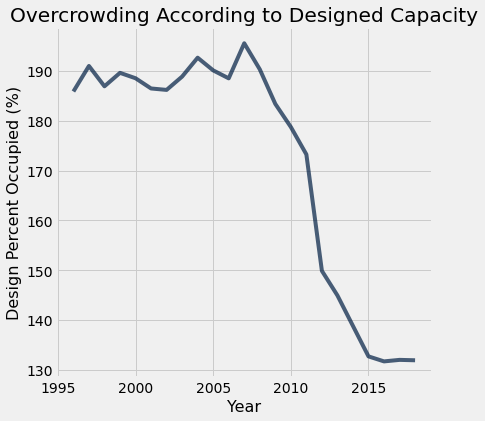

In [9]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding According to Designed Capacity");

#### Staffed Capacity

We have now seen how prisons exceed the number of people allowed per designated space. Given the amount of overcrowding present in prisons, another key aspect we might want to investigate is the number of people employed to maintain this system. To visualize this, we will calculate the percentage of people within prisons given the amount of staff employed to maintain the prison.

Using the same methods as before, we will select and graph this information.

year,total_population sum,staffed_capacity sum,Staff Percent
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814


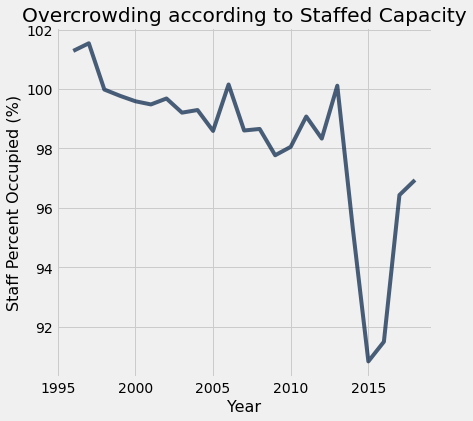

In [10]:
# Select only the necessary columns
total_pop_and_staff = prisons_updated.select("year", "total_population", "staffed_capacity")

# Group by year and sum all values for that year
pop_and_staff_sum = total_pop_and_staff.group("year", sum)

population_column = pop_and_staff_sum.column("total_population sum")
staff_capacity_column = pop_and_staff_sum.column("staffed_capacity sum")

staff_capacity_percentage = (population_column / staff_capacity_column)* 100

# Add a new column with our percentages
staff_and_total_percent_table = pop_and_staff_sum.with_column("Staff Percent", staff_capacity_percentage)
staff_and_total_percent_table.show(3)

staff_and_total_percent_table.plot("year", "Staff Percent")

plt.xlabel("Year") 
plt.ylabel("Staff Percent Occupied (%)")
plt.title("Overcrowding according to Staffed Capacity");

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question 2.1d:</b> What trends do you notice within the line plot?
</div>

<!--
BEGIN QUESTION
name: q21d
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

#### Designed Capacity Versus Staff Capacity

In the last two examples, we saw how crowded prisons have been over time by looking at their designed capacity and staffed capacity. However, it is still unclear what the relationship between the two percentages is. The solution? Make another plot! This time we will include both of the percentages we calculated.

To do this, we will create a new table with three columns, namely:
* Year
* Design Percentage
* Staff Percentage

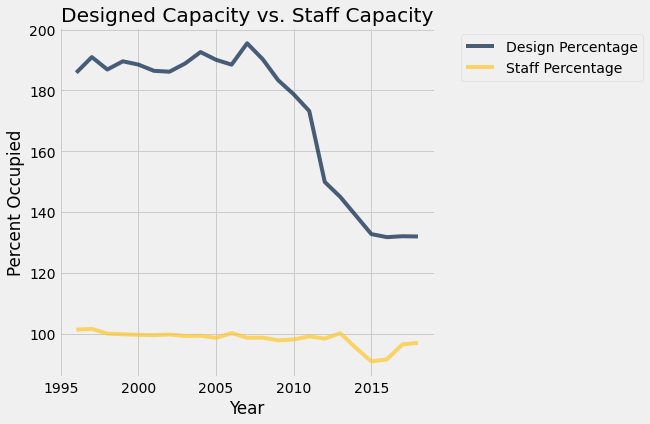

In [11]:
# Create a list/array of all the years we have data for
years = np.arange(1996, 2018 + 1) # We add 1 to include 2018

# Use our new years variable and capacity_percentage and staff_capacity_percentage
# from before as new columns in a new table called compare_table_design_and_staff
compare_table_design_and_staff = Table().with_columns(["year", years,
                                    "Design Percentage", capacity_percentage,
                                    "Staff Percentage", staff_capacity_percentage])

# Create a plot as before!
compare_table_design_and_staff.plot("year") # Notice that we only include one column

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity vs. Staff Capacity");

<!-- BEGIN QUESTION -->
<div class="alert alert-block alert-info">
<b>Question 2.1e:</b> Consider the large gap between the two lines. Why is staff capacity much closer to 100% than designed capacity?
</div>

<!--
BEGIN QUESTION
name: q21e
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

#### Interactive Widget

We have created an interactive widget for you in this section. In this example, you will be able to scroll through all of the prisons in California (numbered from 0 to 39, and you will see how the designed capacity versus population has changed over time.
<font color = #d14d0f>**Run the following cell to load the widget!**</font>

In [12]:
%run -i scripts.py
widgets.VBox([widgets.VBox([inp]), out])

/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


<Figure size 432x288 with 0 Axes>

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question 2.1f:</b> Select any institution from the widget and analyze how that institution's designed capacity changed over time using the three highlighted points. Predict how the design capacity would compare with the staff capacity of that specific institution.
</div>

<!--
BEGIN QUESTION
name: q21f
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

----
## 2.2 Gender Division <a id='subsection22'></a>

The system in place reinforces the idea that the average inmate holds certain characteristics. Since we have limited datasets, we cannot investigate many aspects of this claim. However, in order to get a better understanding of the population that the prison industrial complex was made to hold, we will investigate a few variables such as gender divisions, designed capacity, and staff capacity. 

In [13]:
prisons_updated.show(5)

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


Let's begin by looking at all the **unique** institutions in our dataset. To do this, we will use the `group()` function. 

Run the following cell, which will show us the new table that has been grouped by institution. The "count" column shows us the number of times a prison appears in our dataset. Given the time range, each prison should appear 276 times, but that is not the case!

In [14]:
prisons_updated.group("institution_name").sort("count", descending=True).show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276
CMF (CA MEDICAL FAC),276


As we can see, the maximum number of times that institutions show up are 276, but a number of these institutions shows up less than that amount in our dataset.

You may have noticed that one of the institutions, **VSP (Valley SP)** is listed twice in our table. The California Department of Corrections and Rehabilitation began converting Valley State Prison into a facility for low-risk male inmates in October 2012, and it was completed by January 2013. Click [HERE](https://web.archive.org/web/20120111104018/http://cdcrtoday.blogspot.com/2011/12/cdcr-announces-plan-to-convert-female.html) or [HERE](https://www.cdcr.ca.gov/Facilities_Locator/VSP.html) to learn more. 

From these links you will learn that this conversion came as a result of realignment policies. Due to these policies, we can see in our table above that the counts for the **VALLEY SP (FEMALE)** and **VALLEY SP (MALE)** combined surpass the maximum count of 276 that we see present with the other institutions.

Next, we'll look at some information regarding the designed and staff capacities when comparing male and female institutions.

### Unique Female Prisons

In this section, we will organize the data corresponding to female institutions. In the cell below, we look only at the prisons which we know are strictly female. The following code creates a list or array of all the institutions we know to be strictly female.

Note that  our now separated "Valley SP" institution is included.

In [15]:
female_institutions = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)", "VALLEY SP (FEMALE)")

**Filtering:** Now that we have a list of only the female serving institutions, we will create a new table in which only these select institutions are included, then group by institution to learn about the number of times a given institution appears in our data set. As we determined from our table that was grouped by institutions above, this should be *at most* 276.

In [16]:
# Keep only the institutions in our list
female_data = prisons_updated.where("institution_name", are.contained_in(female_institutions))
female_data.show(3)

female_prisons = female_data.group("institution_name")
female_prisons

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
FOL (FOLSOM SP) (FEMALE),72
FRCC (FRCCC BAKERSFIELD),17
NCWF (NO CAL WOMEN'S FACIL),85
VALLEY SP (FEMALE),204


### Designed Capacity Versus Staff Capacity for Female Institutions

Similar to the last section, we will use the `select()` function to select necessary data in order to calculate the designed versus staff capacities using our new `female_data` table.
We want to combine all the values within the same year across all institutions, so we will use the `group()` function and sum.

In [17]:
fem_year_pop_capacities = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
fem_year_pop_capacities.show(3)

fem_year_groups = fem_year_pop_capacities.group("year", sum)
fem_year_groups.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,790,400,760
1996,2859,2004,3224
1996,794,500,842


year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,108007,72120,104654
1997,120200,70920,115384
1998,125888,70920,123282


Using the same techniques as in previous examples, we will calculate the designed capacity and staff capacity percentages.

In order to compare these two values with each other as we did before, we want to add the percentages to a table. We could either create a new table, or add the percentages to our existing table and select only the necessary columns. Neither approach is more correct than the other, but for readability's sake, we will create a new table below, and then plot the designed and staff percentages together.

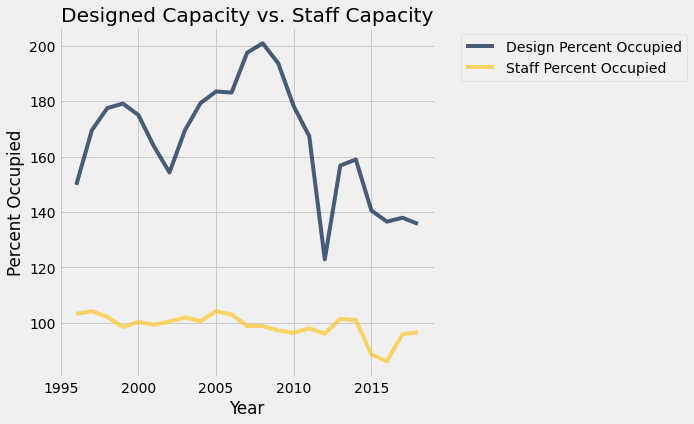

In [18]:
# Create a new variable with all the total population values
fem_total_population = fem_year_groups.column("total_population sum") 

# Calculate designed capacity percentages
fem_design_capacity = fem_year_groups.column("designed_capacity sum")
fem_design_percentage = (fem_total_population / fem_design_capacity) *100

# Calculate staff capacity percentages
fem_staff_capacity = fem_year_groups.column("staffed_capacity sum")
fem_staff_percentage =(fem_total_population / fem_staff_capacity)*100

fem_plot_table = Table().with_columns(
    "year", np.arange(1996, 2018+1),
    "Design Percent Occupied", fem_design_percentage,
    "Staff Percent Occupied", fem_staff_percentage)

fem_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity vs. Staff Capacity");

### Unique Male Prisons

Similar to our process in selecting only the female-serving institutions, we will now repeat our analysis for male serving institutions. Another way to think about the filtering process is that we are excluding rows with female institutions.

Notice how instead of using a function called `are.contained_in()` we are using a function called `are.not_contained_in()`. By doing so, we can skip the step where we make a list/array of only the male-serving prisons.

In [19]:
male_data = prisons_updated.where("institution_name", are.not_contained_in(female_institutions))
male_data.show(3)

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


### Designed Capacity Versus Staff Capacity for Male Institutions

We want to analyze the designed and staff capacities over time, so we will once again use the `select()` function to get relevant data and group by year. Let's repeat the same process as before, but now with our male-only data.

Just as in the female institution example, we will add both of the percentages to a new table, and plot them both.

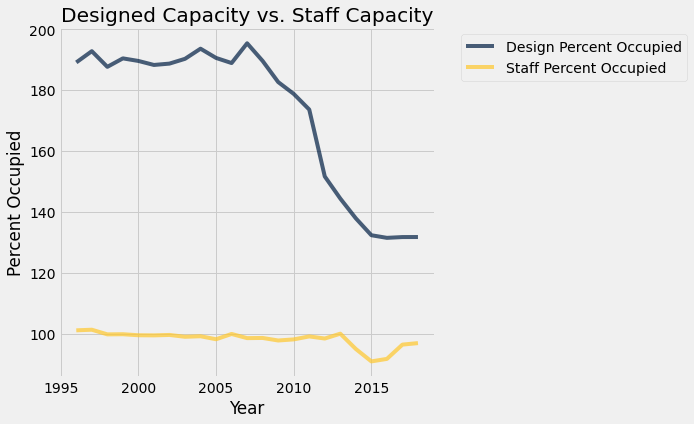

In [20]:
male_grouped_year = male_data.select("year", "total_population", "designed_capacity", "staffed_capacity").group('year', sum)

# Save total male population as new variable
male_total_population = male_grouped_year.column("total_population sum")

# Calculate design capacity percentage
male_design_capacity =  male_grouped_year.column("designed_capacity sum")
male_design_percentage = (male_total_population / male_design_capacity)* 100

# Calculate staff capacity percentage
male_staff_capacity =  male_grouped_year.column("staffed_capacity sum")
male_staff_percentage = (male_total_population / male_staff_capacity) *100

male_plot_table = Table().with_columns(
    "year", np.arange(1996, 2018+1),
    "Design Percent Occupied", male_design_percentage,
    "Staff Percent Occupied", male_staff_percentage)

male_plot_table.plot("year")
plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity vs. Staff Capacity");

### Female vs Male Prisons: Designed and Staffed Capacities

Before we merge the two tables (`fem_plot_table` and `male_plot_table`), we want to differentiate between the `Design Percent Occupied` column in the female table versus the male table, and do the same with the staff percentage column. To do this, we will relabel the column names. The function that we can use to achieve this is `relabel()`. The function takes in two inputs: the old column name, and our new column name.

In [21]:
male_design_relabeled = male_plot_table.relabeled("Design Percent Occupied", "Male Designed Percentage")
male_relabeled = male_design_relabeled.relabeled("Staff Percent Occupied", "Male Staff Percentage")

fem_design_relabeled = fem_plot_table.relabeled("Design Percent Occupied", "Female Designed Percentage")
fem_relabeled = fem_design_relabeled.relabeled("Staff Percent Occupied", "Female Staff Percentage")

Now that we have distinct designed and staff capacities for male and female groups, we can match the values by year. They contain information over the same years. To combine tables, we use a function called `join()`. The format for the function is:
- *data_table_one* `.join(` *column_in_common*, *data_table_two*`)`, where column_in_common is the name of the column that appears in both tables.

In [22]:
male_and_female_table = male_relabeled.join("year", fem_relabeled)
male_and_female_table.show(3)

year,Male Designed Percentage,Male Staff Percentage,Female Designed Percentage,Female Staff Percentage
1996,189.107,101.147,149.76,103.204
1997,192.793,101.347,169.487,104.174
1998,187.651,99.8235,177.507,102.114


Now we can do some comparative analysis on the two types of institutions. In the cells below, we will generate some graphs to compare designed capacity between male and female prisons, as well as staff capacity between the two.



### Male Prisons vs Female Prisons in Staff and Designed Capacity

How does the combination of male and female institutions compare with the institutions overall (not separated between male and female)? To answer this question, let's create a new table that contains only the designed and staff percentages we found at the beginning of our notebook. The cell below creates this table, which contains the percentages among both male and female institutions.

In [23]:
# Create an array of all the years we have data for
years = np.arange(1996, 2018 + 1) # We add 1 to include 2018

# Use our years variable and capacity_percentage and staff_capacity_percentage
# from before as new columns in our table
total_percentages = Table().with_columns(["year", years,
                                    "Total Designed Percentage", capacity_percentage,
                                    "Total Staff Percentage", staff_capacity_percentage])
total_percentages

year,Total Designed Percentage,Total Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814
1999,189.598,99.7716
2000,188.514,99.5868
2001,186.463,99.4802
2002,186.176,99.6799
2003,188.85,99.2042
2004,192.636,99.2918
2005,190.092,98.5895


We want to combine the total percentages table above with the table that contains the percentages for male and female prisons separately. To combine the two tables, we will use the `join()` function again. We can then make a plot of the percentages for male institutions, female institutions, and both!

In [24]:
all_joined = total_percentages.join("year", male_and_female_table)
all_joined.show(3)

year,Total Designed Percentage,Total Staff Percentage,Male Designed Percentage,Male Staff Percentage,Female Designed Percentage,Female Staff Percentage
1996,185.859,101.281,189.107,101.147,149.76,103.204
1997,190.978,101.537,192.793,101.347,169.487,104.174
1998,186.899,99.9814,187.651,99.8235,177.507,102.114


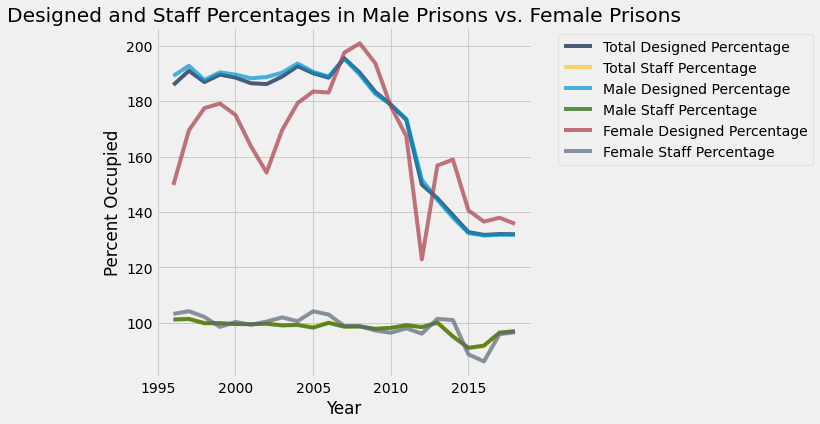

In [25]:
all_joined.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed and Staff Percentages in Male Prisons vs. Female Prisons");

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question __</b> Comment on the plot above. What are the differences between designed and staffed capacity? What are some patterns unique to female institutions? Why does the total population look almost identical to the male prisons percentages?
</div>

<!--
BEGIN QUESTION
name: q22a
points: 1
manual: true
-->

*Replace this text with your answer*

<!-- END QUESTION -->

----

## Section 3: Jails <a id='jailssection'></a>

We'll now look at the effects of realignment on jails in California. As we did in the last section, we'll analyze the differences in designed vs. staffed capacity and the gender division in sentenced and unsentenced populations in county jails.

----

### The Data

We will work with data from the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 


The Jail Profile Survey releases reports on data recorded by local agencies. Some of the information we will find here include the total number of unsentenced and sentenced males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution of state bond monies and future projections for other jail needs.

If you are interested in learning more please visit [Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf)  and [Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp).


#### Data Dictionary
Below is a data dictionary for future reference. This data dictionary goes over what the column names represent in the data we will load below.

|Column Name   | Description |
|--------------|---------|
|Jurisdiction | The unit of government that has legal authority over an inmate (state or federal)|
|Facility | Name of the county jail |
|Year |Year that the data was collected |
|Month | Month that the data was collected |
|Unsentenced males| Non-sentenced inmates are all inmates other than those who have been sentenced on all charges pending * ** |
|Unsentenced females| Non-sentenced inmates are all inmates other than those who have been sentenced on all charges pending * **|
|Sentenced males| Sentenced inmates are those who have been sentenced on all charges and are no longer on trial. This category includes inmates who are being incarcerated pending or during an appeal. * |
|Sentenced females|Sentenced inmates are those who have been sentenced on all charges and are no longer on trial. This category includes inmates who are being incarcerated pending or during an appeal. * |
|Total facility ADP| ADP Total should include all inmates (including those under contract from any agency/jurisdiction) assigned to all single/double and multiple occupancy cells, administrative segregation, disciplinary isolation, and medical and mental health beds.|


**Please note the following:**

\* The counts for sentenced and unsentences male/female inmates is an *average daily population (ADP)* for the given month.


** For example, if an inmate has been sentenced on three charges but is still being tried on a fourth charge, they should be reported as “non-sentenced.”

** If an inmate is found not to be competent for trial and is detained in a county jail facility, count them in Non-Sentenced (Male/Female & Misdemeanor/Felony). If they are detained in the state hospital, do not count them in any category.

#### Importing the Data

Let's start off by importing our `jail` data. Similar to what we did earlier, we'll create an instance of a table (`Table()`) and populating it with our data which we read in from a location within our folders. It takes in a file and reads and outputs it as a table.

In [ ]:
jail = Table().read_table("data/jails_cleaned.csv")
jail.show(5)

-------

## Section 4: Data Analysis <a id='section4'></a>
Just as we did with the Prisons dataset, the first thing we want to do is check that the number of months does not exceed 276. We'll group by `Facility` using the `group()` table function and then sort by `count` using the `sort()` table function and set descending to True.

In [ ]:
jail_grouped = jail.group("Facility")
jail_grouped.sort('count', descending = True)

Do you see any count abnormalities? In contrast to our Prisons notebook, there do not seem to be any issues with the counts!

In the table above, we produced a table with a row entry for each month in a given year for 23 years for each jail. Like we did in our previous notebook, we want to get the **yearly total for each institution** to explore how this total number of inmates in the jail population changed over time. To accomplish this, the first thing we need to do is aggregate or group some columns.

Our first step is to select the appropriate columns. We select the columns `Year`, `Unsentenced males`, `Unsentenced females`, `Sentenced males`, `Sentenced females`, and `Total facility ADP` using the `select()` function.

Next we want to store this as a new variable for future use. We assign this new table to a variable called `data_year`, then obtain the yearly totals for each institution.

In [ ]:
data_year = jail.select('Year','Unsentenced males', 'Unsentenced females','Sentenced males','Sentenced females', 'Total facility ADP')
data_year = data_year.group("Year", sum)
data_year.show(5)

Our first investigation will be into the total facility ADP over the years. For the remainder of the notebook, we will focus on years that mark significant shifts in population among jails. We will focus mainly on 2011 and 2014 by plotting red dots to mark those years in cells below.

First, let's obtain the data where the year equals 2011 and 2014. To do this we will use the `where()` table function to limit our data to the year 2011 and assign it to a new variable `data2011`, and similarly for 2014.

In [ ]:
data2011 = data_year.where("Year", 2011)

data2014 = data_year.where('Year', 2014)

Note that we are only interested in the last column, `Total facility ADP sum`, and the year. We can select that from the previous cell and assign it to `y_coordinate_2011` and `y_coordinate_2014`. Now that we have our desired two points, we can plot the `Total facility ADP sum` vs. `year` and overlay the data points from 2011 and 2014. Run the cell below to generate the plot.

In [ ]:
x_coordinate_2011 = data2011.column('Year')
y_coordinate_2011 = data2011.column('Total facility ADP sum')

x_coordinate_2014 = data2014.column("Year")
y_coordinate_2014 = data2014.column("Total facility ADP sum")

data_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro')
plt.plot(x_coordinate_2014, y_coordinate_2014, 'ro');

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question 2a:</b> In looking at the graph you produced, how does it reflect the systematic changes of California's potential jail population?
</div>

<!--
BEGIN QUESTION
name: q4a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->


### Section 4.1: Sentenced vs Unsentenced  <a id='section41'></a>
In this section we revisit designed and staffed capacities. We will go ahead and compare the sentenced and unsentenced populations for county jails. We will specifically be creating and looking at the following comparisons:
* Overall (male and female) sentenced and (male and female) unsentenced
* Male unsentenced vs male sentenced
* Female unsentenced vs female sentenced

To understand how sentenced vs unsentenced jail populations have changed over time, we will need to estimate the totals for each of these two categories. In looking at our data set we can notice that is is composed of 4 main columns, however none displays the total for these categories. 

|Sentenced males|Sentenced females|Unsentenced males| Unsentenced females|Total facility ADP|
|--------------|---------|------|----------|-----|

Therefore, we begin by calculating the sentenced total and the unsentenced total. We will need to combine male and female data for each of these two categories.

Let's begin by separating each column into a new variable so that we can easily extract and later combine the values that we need. As a refresher, you can use the table function `column()` to select the values in a given column.

First, we select all the values for male sentenced and female sentenced and save it into new variables `m_sentenced` and `f_sentenced` respectively, and the same for  **unsentenced** males and females to `m_unsentenced` and `f_unsentenced`.

In [ ]:
m_sentenced = data_year.column("Sentenced males sum")
f_sentenced = data_year.column("Sentenced females sum")

m_unsentenced = data_year.column("Unsentenced males sum")
f_unsentenced = data_year.column("Unsentenced females sum")

We can add the values from `m_sentenced` and `f_sentenced` into a single column to get the total sentenced per year, and the same for `m_unsentenced` and `f_unsentenced`.

In [ ]:
sentenced_all =  m_sentenced + f_sentenced

unsentenced_all = m_unsentenced + f_unsentenced 

We can now go ahead and add these two values to our original data table (called `data_year`). We will use the table function `with_column()` which takes in a label for your column, and the values that you want to assign to that new column.

In [ ]:
data_year = data_year.with_column("Total Sentenced", sentenced_all)
data_year = data_year.with_column("Total Unsentenced", unsentenced_all)

data_year.show(5)

---
Now we can explore the data as **percentages**. (Why we might want to work with percentages instead of counts?) Our end goal here will be to plot percent ADP over time.

To do this, we can get our total using the column `Total facility ADP sum` and then divide the total sentenced and total unsentenced by this value. 

In [ ]:
total_adp = data_year.column("Total facility ADP sum")

sent_percent = sentenced_all / total_adp * 100
unsent_percent = unsentenced_all / total_adp * 100

Now that we have our percentages, let's repeat the same process as before to add these new percentage values to our `data_year` table and select the relevant columns that we want in order to plot percent ADP over time.

In [ ]:
data_year = data_year.with_column("Total Sentenced Percent", sent_percent)
data_year = data_year.with_column("Total Unsentenced Percent", unsent_percent)

percent_totals = data_year.select("Year", "Total Sentenced Percent", "Total Unsentenced Percent")
percent_totals

We'll plot dots so we can highlight specific years in the jails, namely, 2011 and 2014. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data in the years 2011 and 2014.

In [ ]:
data2011 = percent_totals.where("Year", 2011)
data2014 = percent_totals.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using `data2011`, we can now assign `x_coordinate2011` to the `year` column and the `y_coordinate2011` to the `Percent` column. This process is similar to the plot of the Total Facility ADP over time from earlier. We repeat similar steps to generate the plot below.

In [ ]:
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Sentenced Percent")
y_coordinate2011_un = data2011.column("Total Unsentenced Percent")

x_coordinate2014 = data2014.column("Year")
y_coordinate2014 = data2014.column("Total Sentenced Percent")
y_coordinate2014_un = data2014.column("Total Unsentenced Percent")

percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People")

plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014_un, 'ro');

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question 2a:</b> Is there anything interesting that you see related to the percentages and years?
</div>

<!--
BEGIN QUESTION
name: q41a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

### Section 4.2: Gender Division

#### Sentenced vs. Unsentenced Across Gender

We just looked at the total number of people who were sentenced and the total number of people who were unsentenced by year. Next, let's look at just the number of **males who were sentenced vs the number of males who were unsentenced**. Let's start by selecting the relevant columns that we are going to use for our analysis.

We have found and plotted the counts of males but let's try finding the **percentage** of males from the total ADP count. Start by getting the sum of the sentenced males column, the sum of the unsentenced males column, and then dividing both of these columns by the total ADP.

Let's add these new percentage columns to our male table and then select the appropriate columns for plotting.

In [ ]:
males = data_year.select("Year", "Sentenced males sum", "Unsentenced males sum")

male_sent = males.column("Sentenced males sum")
male_unsent = males.column("Unsentenced males sum")

m_sent_percent = male_sent / total_adp * 100
m_unsent_percent = male_unsent / total_adp * 100

males = males.with_column("Total Male Sentenced Percent", m_sent_percent)
males = males.with_column("Total Male Unsentenced Percent", m_unsent_percent)
m_percent_totals = males.select("Year", "Total Male Sentenced Percent", "Total Male Unsentenced Percent")

m_percent_totals

Now we'll plot the **percentage** of males who were sentenced vs the percentage of males who were unsentenced.

In [ ]:
# Filtering data for just 2011 and 2014
data2011 = m_percent_totals.where("Year", 2011)
data2014 = m_percent_totals.where("Year", 2014)

# Create x and y coordinates for 2011
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Male Sentenced Percent")
y_coordinate2011_un = data2011.column("Total Male Unsentenced Percent")

# Create x and y coordinates for 2014
x_coordinate2014 = data2014.column('Year')
y_coordinate2014 = data2014.column("Total Male Sentenced Percent")
y_coordinate2014_un = data2014.column("Total Male Unsentenced Percent")

# Base plot creation
m_percent_totals.plot("Year")

plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males")


# Adding our points
plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014_un, 'ro');

#### Females: Sentenced vs. Unsentenced

Above we analyzed just the males that were sentenced and unsentenced. Because the process is exactly similar (and for the sake of brevity), we have included the image of the resulting plot, which plots the relationship between the percentages of sentenced females and unsentenced females. Since we have omitted the code, how can we adapt the code used previously for the following plot?

<img src="./data/42plot.png" alt="Percent Sentenced vs. Total Unsentenced Percents (Females)" style="width: 800px;"/>

<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Question 2a:</b> Compare the totals plot (completed in section 4.1) to the one you just created. What kind of story does this plot reveal?
</div>

<!--
BEGIN QUESTION
name: q42a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
<div class="alert alert-block alert-info">
<b>Question 4.2b:</b> Given the last graph from the previous notebook, compare your final results to the ones presented here. What story do these two data sets (Prisons and Jails) tell you when you look at them side by side? How do they show the impact of realignment? The graph is shown below.
</div>

<!--
BEGIN QUESTION
name: q42b
points: 1
manual: true
-->

<img src='./data/lecture1_finalgraph.png'>

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->

<div class="alert alert-block alert-info">
<b>Labor Question:</b> How much time did you spend completing this module? Did you find outside resources that helped you? if so what were they?
</div>


<!--
BEGIN QUESTION
name: QL
points: 1
manual: true
-->


**Answer here** *Double click to edit this markdown cell with your answer*

<!-- END QUESTION -->

#### Feedback Survey
Please consider filling out this [survey](https://docs.google.com/forms/d/e/1FAIpQLScd1q8VqvOMuVvLfhbVswckYKg1HFVwVu_bTF5NWbVZr4qWhw/viewform?usp=sf_link) to help us improve this module.

In [ ]:
# Save your notebook first, then go to `Kernel` > `Restart and Run All Cells`
# Download the zip file, which contains a copy of your notebook and your written responses.
generator.export("notebook3.ipynb")